<a href="https://colab.research.google.com/github/marianayarce1224/lab_biosenales/blob/main/PRACTICA3/P3_Parte1_Python_G3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="left"><img alt="udeA logo" height="150px" src="https://www.udea.edu.co/wps/wcm/connect/udea/99fc43e7-7a64-45bd-97fc-96639b70813d/logosimbolo-vertical.png?MOD=AJPERES&CVID=ljeLvHr"></p>

<h1><b>Práctica 3 - Parte 1: Análisis estadístico de señales ECG
</b></h1>
<h4><b>Bioseñales y sistemas<br>Universidad de Antioquia, Facultad de Ingeniería - Bioingeniería<br>2024-2</b></h4><br>

<h4><b>Grupo:</b> 3</h4>
<h4><b>Integrantes:</b> Mariana Álvarez Yarce - Ana María Seguro Acevedo</h4>

#<b>Procedimiento</b>

<h4>Realice los enunciados en un Notebook o un script entregable.</h4>

<h4>Implemente una función que permita calcular el valor cuadrático medio (RMS) de una señal. El valor RMS se define en forma discreta con N número de muestras, como:</h4>

<center><h4>$x_{\text{RMS}} = \left[ \frac{1}{N} \sum_{i=1}^{N} x(i)^2 \right]^{\frac{1}{2}}$</center></h4>

In [21]:
import numpy as np

def rms(x):
  n = 0
  for i in range(len(x) - 1):
    n = n + x[i]**2
    print(n)
  x_rms = np.sqrt(1/len(x) * n)
  return x_rms

##<b>Análisis estadístico de ECG</b>

<h4><b>1. </b>A partir de la información suministrada en el archivo .mat, determine el tiempo de duración de las señales, cree un vector de tiempo.</h4>

Se empieza por cargar manualmente desde el dispositivo personal al entorno de Colab el archivo <i>signals.mat</i>, por medio de funciones de la librería <i>Scipy.io</i>. Posteriormente, se construye un dataframe con los registros numéricos y las etiquetas de identificación de cada señal, con el fin de facilitar el manejo de las señales.

Finalmente, se determinó la duración de las señales mediante el cociente del número de muestras y la frecuencia de muestreo de 1024<i>Hz</i>. Para crear el vector de tiempo se utilizó un rango desde 0 hasta el promedio de la duración de todas las señales.

In [22]:
import matplotlib.pyplot as plt
from scipy.io import loadmat
import pandas as pd

data = loadmat('signals.mat', simplify_cells=True) # se debe cargar manualmente el archivo en Colab en la carpeta llamada 'content'
data_dict = {key: value for key, value in data.items() if not key.startswith('__')}
frequency = data_dict['Fs']
data_dict.pop('Fs')

dfs = [pd.DataFrame(data={key:value}) for key, value in data_dict.items()]
signals_df = pd.concat(dfs, axis=1).fillna(0)

duration = [len(signals_df[signal])/frequency for signal in signals_df.columns]
print(f'Duración promedio de las señales: {np.mean(duration)}')
t = np.linspace(0, round(np.mean(duration))+1, num=signals_df.shape[0])
print(f'\nVector de tiempo: {t}')

Duración promedio de las señales: 30.0009765625

Vector de tiempo: [0.00000000e+00 1.00911458e-03 2.01822917e-03 ... 3.09979818e+01
 3.09989909e+01 3.10000000e+01]


<h4><b>2. </b>Grafique la señal sin filtrar y filtrada, compárelas. Comente lo que observa, y describa cómo debe ser el comportamiento del filtro que se utilizó. Recuerde las frecuencias de interés de la señal ECG.</h4>

In [25]:
ecg_signal = signals_df.loc[signals_df['ECG_asRecording'] != 0].iloc[:, :2]
ecg_signal.describe()

,ECG_asRecording,ECG_filtered
count,30720.000000,30720.000000
mean,4381.171892,3.177640
std,321.724497,286.292596
min,3398.603760,-685.695445
25%,4210.507202,-113.580604
50%,4328.128418,-49.076634
75%,4467.498901,34.473454
max,6643.640625,2003.328087


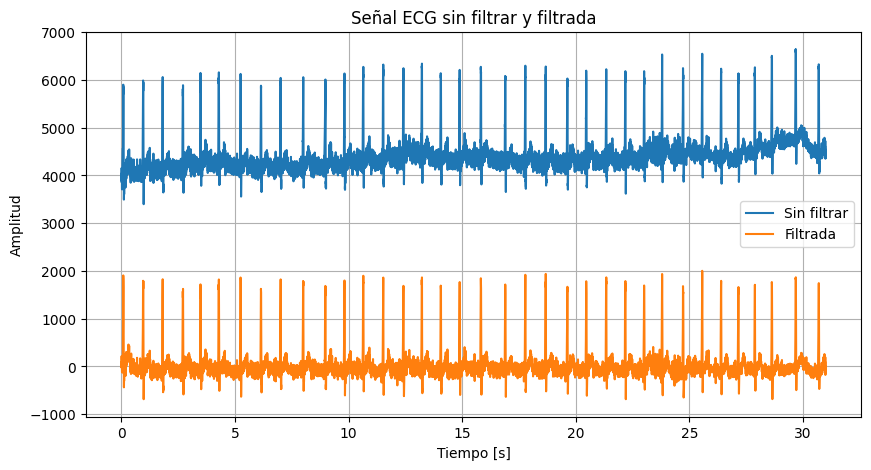

In [24]:
fig, axs = plt.subplots(1,1, figsize=(10,5))

axs.plot(t[:-1], signals_df.loc[signals_df['ECG_asRecording'] != 0]['ECG_asRecording'])
axs.plot(t[:-1], signals_df.loc[signals_df['ECG_filtered'] != 0]['ECG_filtered'])
axs.set_title('Señal ECG sin filtrar y filtrada')
plt.legend(['Sin filtrar', 'Filtrada'])
axs.set_xlabel('Tiempo [s]')
axs.set_ylabel('Amplitud')
axs.grid()
plt.show()

Se observa una disminución de la amplitud en los puntos máximos, así como un ajuste del desfase de la señal sin filtrado que se hallaba centrada en aproximadamente 4381, según la media de la columna <i>ECG_asRecording</i>. La gráfica para la señal filtrada tiene una tendencia más lineal entre los picos, lo cual puede deberse a la eliminación del desfase considerando la media.

In [27]:
unfilt_amplitude = ecg_signal['ECG_asRecording'].max() - ecg_signal['ECG_asRecording'].min()
filt_amplitude = ecg_signal['ECG_filtered'].max() - ecg_signal['ECG_filtered'].min()
print(f'Diferencia máxima amplitud (sin filtrar): {unfilt_amplitude}')
print(f'Diferencia máxima amplitud (señal filtrada): {filt_amplitude}')

Diferencia máxima amplitud (sin filtrar): 3245.036865234375
Diferencia máxima amplitud (señal filtrada): 2689.0235325654057


Al calcular las diferencias entre los máximos y mínimos de ambas señales, se evidencia una disminución sutil del rango de amplitud de la señal filtrada con respecto a la filtrada, con valores de 2689 y 3245, respectivamente.